In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv('Main_data.csv', index_col=False)

In [ ]:
target = pd.read_csv('data.csv', sep=';')

In [4]:
data2['Target'] = target['Target']

In [5]:
from tqdm import tqdm

class SoftmaxRegression:
    def __init__(self, epoch: int, lr: float):
        self.epoch = epoch
        self.lr = lr
        self.weights = None
        self.losses = []
        self.metrics = []
        self.classes_ = None

    def softmax(self, X):
        X = np.array(X) 
        X_exp = np.exp(X - np.max(X, axis=1, keepdims=True))
        partition = X_exp.sum(axis=1, keepdims=True)
        return X_exp / partition 

    def loss_function(self, y, y_hat):
        epsilon = 1e-6
        return -np.mean(np.sum(y * np.log(y_hat + epsilon), axis=1))
    
    def accuracy(self, y, y_hat):
        y_pred_labels = np.argmax(y_hat, axis=1)
        y_true_labels = np.argmax(y, axis=1)
        return np.mean(y_pred_labels == y_true_labels)
    
    def fit(self, X, y):
        n, d = X.shape
        k = y.shape[1] 
        self.weights = np.zeros((d, k))
        
        with tqdm(range(self.epoch)) as tq:
            for e in tq:
                tq.set_description(f'Epoch {e+1}/{self.epoch}')
                y_hat = self.softmax(X @ self.weights)
                d_dw = 1/n * X.T @ (y_hat - y)
                self.weights -= self.lr * d_dw

                loss = self.loss_function(y, y_hat)
                acc = self.accuracy(y, y_hat)
                
                self.losses.append(loss)
                self.metrics.append(acc)
                
                tq.set_postfix({"Loss": loss, "Accuracy": acc})

    def predict(self, X):
        return self.softmax(X @ self.weights)

In [6]:
model = SoftmaxRegression(2000, 0.0002)

In [7]:
X = data2.iloc[:, :].drop(columns='Target')
y = data2.iloc[:, 35].to_numpy().reshape(-1, 1)

In [8]:
def one_hot_encode(y):
    classes = ["Dropout", "Enrolled", "Graduate"] 
    encoded = np.zeros((len(y), len(classes)), dtype=int)
    
    for i, label in enumerate(y):
        if label in classes:
            encoded[i, classes.index(label)] = 1
    
    return encoded

In [9]:
y = one_hot_encode(y)

In [10]:
y

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], shape=(4424, 3))

In [11]:
model = SoftmaxRegression(epoch=5000, lr=0.0001)
model.fit(X, y)

Epoch 5000/5000: 100%|██████████| 5000/5000 [00:26<00:00, 189.54it/s, Loss=0.698, Accuracy=0.719]


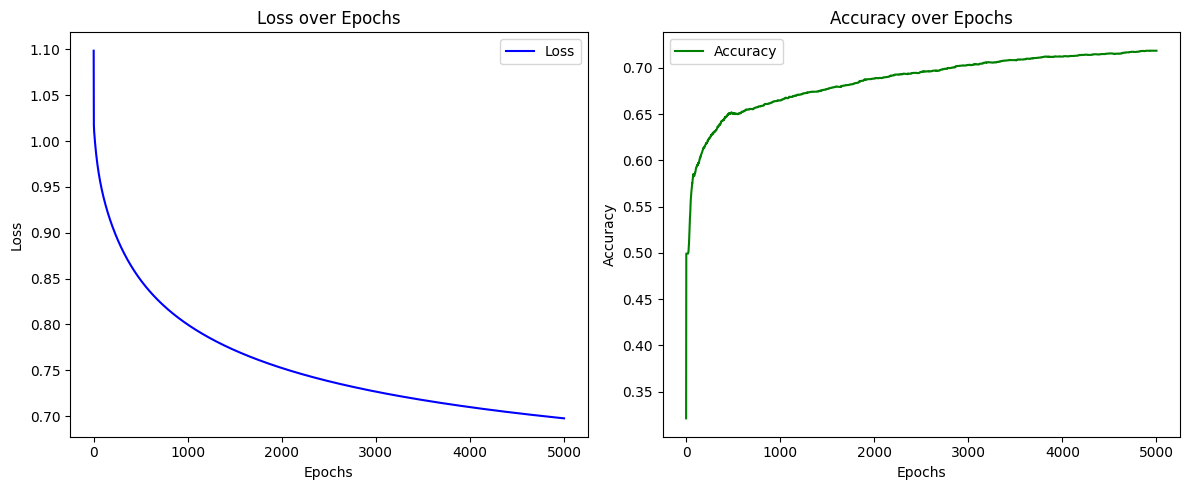

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(1, model.epoch + 1), model.losses, label='Loss', color='b')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(range(1, model.epoch + 1), model.metrics, label='Accuracy', color='g')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()